## Carregamento e análise dos dados

### Load do Dataset que vai servir de base para nosso treinamento

In [1]:
from tensorflow import keras

# Definição do nosso Dataset com as informações da base de dados do keras
dataset = keras.datasets.fashion_mnist

# dataset.load_data() => retorna um conjunto de duas tuplas com as informações de treino e teste
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

### Formato dos nossos dados

In [2]:
display(imagens_treino.shape)
display(imagens_teste.shape)

(60000, 28, 28)

(10000, 28, 28)

In [3]:
display(identificacoes_treino.shape)
display(identificacoes_teste.shape)

(60000,)

(10000,)

### Exibição de exemplos do nosso Dataset

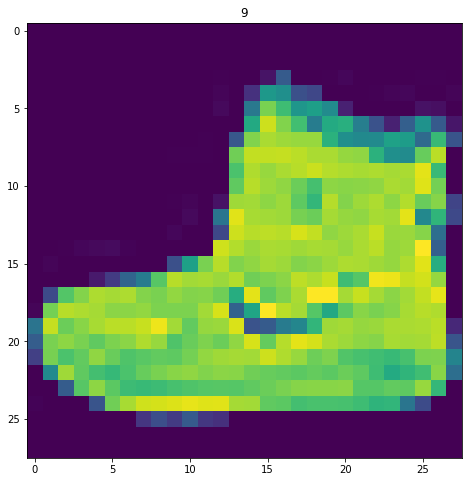

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

# Função da Lib para exibir imagens => passando o index de onde a imagem está
plt.imshow(imagens_treino[0])

# Função para colocar titulo no gráfico => passando o index da identificação do nosso treino
plt.title(identificacoes_treino[0]);

In [5]:
display(identificacoes_treino.min())
display(identificacoes_treino.max())
total_classificacoes = 10
print(f"Total de classificações: {total_classificacoes}")

0

9

Total de classificações: 10


### Escala de cor na imagem
 - Futuramente será feita uma redução para evitar "loss"

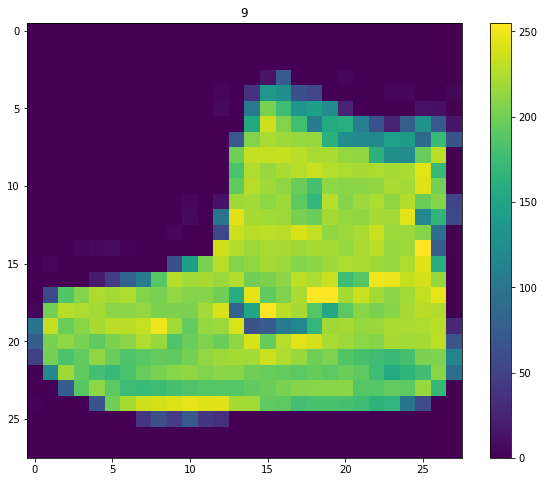

In [6]:
plt.figure(figsize=(10,8))
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
plt.colorbar();

### Exemplos de classificações dentro do Dataset

In [7]:
# Mapeamento dos nomes de cada classificação com base no Github oficial
nomes_classificacoes = ["Camiseta", "Calça", " Pullover", 
                        "Vestido", "Casaco", "Sandalha", 
                        "Camisa", "Tenis", "Bolsa", "Bota"]

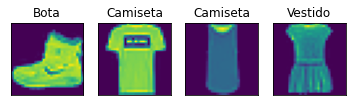

In [8]:
for imagem in range(4):
    # Função do subplot serve para mostrar diversas imagens dentro de um "for"
    # Passando o número de linhas, o número de colunas e a quantidade de repetição
    plt.subplot(1, 4, imagem+1)
    plt.imshow(imagens_treino[imagem])
    # nomes_classificacoes[identificacoes_treino[imagem]] => identificacoes_treino[imagem] retorna um número com a posição no
    # vetor de mapeamento para mostrar bonitinho nos gráficos
    plt.xticks([])
    plt.yticks([])
    plt.title(nomes_classificacoes[identificacoes_treino[imagem]])

## Construção do modelo
   - Modelo:
    - Entrada
    - Processamento
    - Saída

In [9]:
import tensorflow

# Normalização
# Escalonamento para reduzir o "loss"
# Divisão da escala de cor da imagem para ficar entre 0 e 1
imagens_treino = imagens_treino/255.0

# Sequencia de passos do modelo
model = keras.Sequential([
    # Entrada
    # Definição dos layers com o achatamento das nossas duas dimensões de para uma dimensão só
    keras.layers.Flatten(input_shape=(28, 28)), # Camada 0
    
    # Processamento
    # Número de "bolinhas" da camada e metodologia de ativação
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # Camada Densa, conectividade com todas as outras "bolinhas"
    
    # Adormecer camadas para evitar o vício
    keras.layers.Dropout(0.25), # Convenção de 20% dos neuronios dormindo
    
    # Camadas Ocultas
    # Teste de possíveis camadas intermediárias para verificar resultados diferentes
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.25),
#     keras.layers.Dense(32, activation=tensorflow.nn.relu),
    
    # Saída
    # Número de "bolinhas" é igual ao número de classificações que nós temos e a ativação
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

# É preciso compilar o modelo antes de treinar/testar
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo => passando o x, y e número de ciclos de treino que devem ser realizados
# Argumento para fazer validação no fit
historico = model.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6544 - accuracy: 0.7656 - val_loss: 0.4235 - val_accuracy: 0.8438
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4685 - accuracy: 0.8334 - val_loss: 0.4044 - val_accuracy: 0.8491
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4258 - accuracy: 0.8486 - val_loss: 0.3839 - val_accuracy: 0.8564
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4034 - accuracy: 0.8550 - val_loss: 0.3572 - val_accuracy: 0.8692
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3829 - accuracy: 0.8616 - val_loss: 0.3563 - val_accuracy: 0.8702
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3664 - accuracy: 0.8678 - val_loss: 0.3494 - val_accuracy: 0.8750
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3584 - accuracy: 0.8715 - val_loss: 0.3412 - val_accuracy:

## Analisando o resultado do treinamento e validação

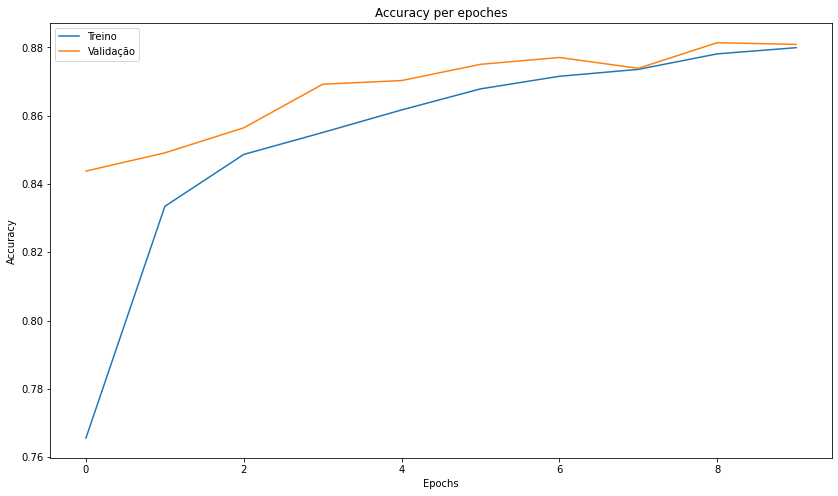

In [10]:
# Retorna um dicionário com todas as métricas do fit
# display(historico.history)

# Maneira de acessar as informações dentro do dicionário
val_acc = historico.history['val_accuracy']
acc = historico.history['accuracy']
val_loss = historico.history['val_loss']
loss = historico.history['loss']

plt.figure(figsize=(14,8))
plt.plot(acc)
plt.plot(val_acc)
plt.title("Accuracy per epoches")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Treino", "Validação"]);

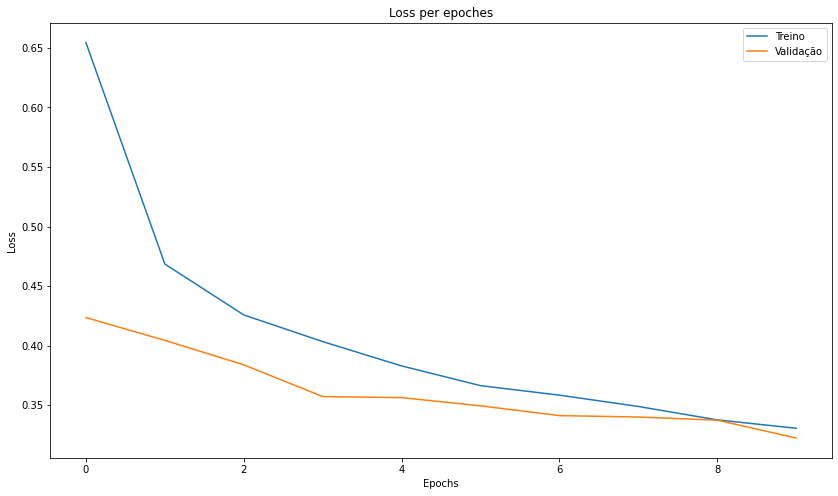

In [11]:
plt.figure(figsize=(14,8))
plt.plot(loss)
plt.plot(val_loss)
plt.title("Loss per epoches")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Treino", "Validação"]);

## Validação dos dados

In [12]:
imagens_teste = imagens_teste/255.0

# Avaliação do modelo
# Retorna o "loss" e a accuracy do modelo
display(model.evaluate(imagens_teste, identificacoes_teste))

313/313 [==============================] - 1s 2ms/step - loss: 0.3515 - accuracy: 0.8751


[0.3514595627784729, 0.8751000165939331]